# Analysis on the `tips` dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#!pip3 install --upgrade seaborn # Updates the seaborn version in the collab notebook.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Today we will continue working with the `tips` dataset. As a reminder, this dataset contains 7 columns:
- `total_bill` which is the total amount spent at the restaurant
- `tip` which is the tip left on top of the `
- `sex` of the customer
- `smoker` Yes if the customers were smokers or No if not
- `day` of the which the meal took place
- `time` of the day it happened
- `size` which is the number of people at the table

# Introduction to Exploratory Data Analysis

EDA or Exploratory Data Analysis is the usually the first step in analysing a dataset. It's how we make ourselves familiar with the data and understand what it can tell us and what it can't tell us.

We will be looking at a few basic techniques of EDA and trying to give a framework for you to _structure_ your EDA journey.

In [2]:
# Load the datasdet 
sns.set(style="whitegrid") # also do this to make charts look better :)
# you can also try : "dark", "white", "white"
#or >>> sns.set_context("poster") >>> http://seaborn.pydata.org/tutorial/aesthetics.html 

tips = sns.load_dataset("tips") # https://github.com/mwaskom/seaborn-data

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Dataset format and general content

This is the step where we start understanding what the dataset contains and what it can tell us.

(to recap, as these techniques have already been covered)

Questions you will ask:
- What columns does the dataset have? What do they mean? What data type are they?
- What does _each row_ represent?
  - e.g. in a population dataset, is each row a person or a group of people?

Techniques you will use:
- `df.head()` is very useful to get an intuitive sense
- `df.describe()` will give you an overall picture of data distribution, quantities, etc.
- `df.dtypes` will let you know the types of data that you have and whether you need to perform some conversions
- A good check to perform at this stage is `df.isna().sum()` to know if you have missing values — we will learn how to deal with them in a later class


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe(include='all').fillna('') # fillna('') replaces NaN values with empty spaces to make the result more readable

,total_bill,tip,sex,smoker,day,time,size
count,244.0,244.0,244,244,244,244,244.0
unique,,,2,2,4,2,
top,,,Male,No,Sat,Dinner,
freq,,,157,151,87,176,
mean,19.785943,2.998279,,,,,2.569672
std,8.902412,1.383638,,,,,0.9511
min,3.07,1.0,,,,,1.0
25%,13.3475,2.0,,,,,2.0
50%,17.795,2.9,,,,,2.0
75%,24.1275,3.5625,,,,,3.0


**Discuss**
What can we conclude from the above?
- Does the dataset seem to have null values?
- How are the 

In [6]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
tips.isna().sum() # a kinda hacky way of counting nulls

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# Distributions and Correlations

For the next step we can start with a simple pairplot, this will pair every variable in the dataset to another one and give us an overview of how they affect eachother

`sns.pairplot()` can take many arguments but at its very simplest it will take a dataset and plot all numeric variables against each other and tell us:
- Distribution
- *Correlation*

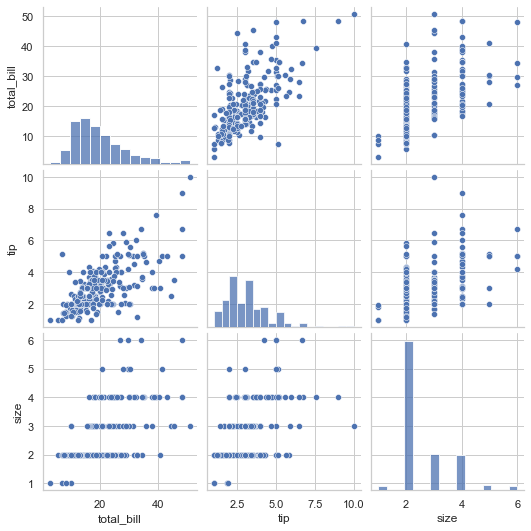

In [8]:
sns.pairplot(tips)

<AxesSubplot:ylabel='Frequency'>

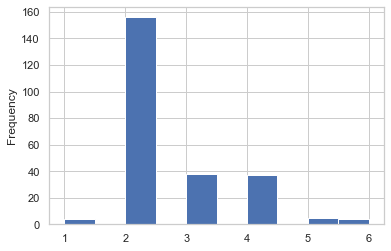

In [9]:
tips["size"].plot.hist()

In [10]:
tips["size"].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

So far we can draw three conclusions:
- Tip and Total bill seem fairly well correlated
- Both variables have a long tailed distribution
- Party / table size correlates somewhat broadly with the other two

But we're missing many variables.

To include them, we will use the `hue` parameter

In [11]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

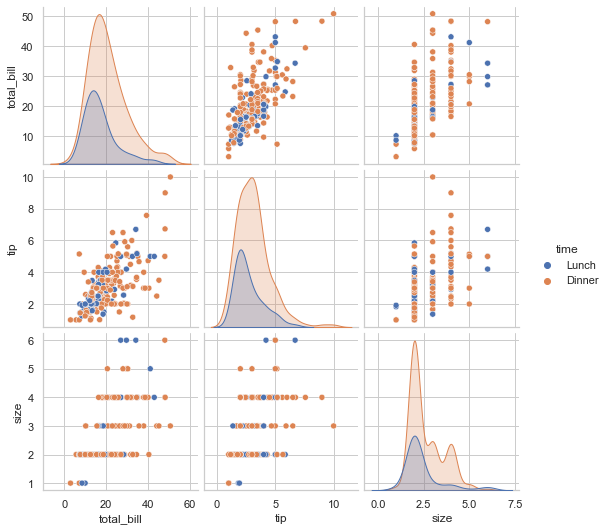

In [12]:
sns.pairplot(tips,  hue='time')

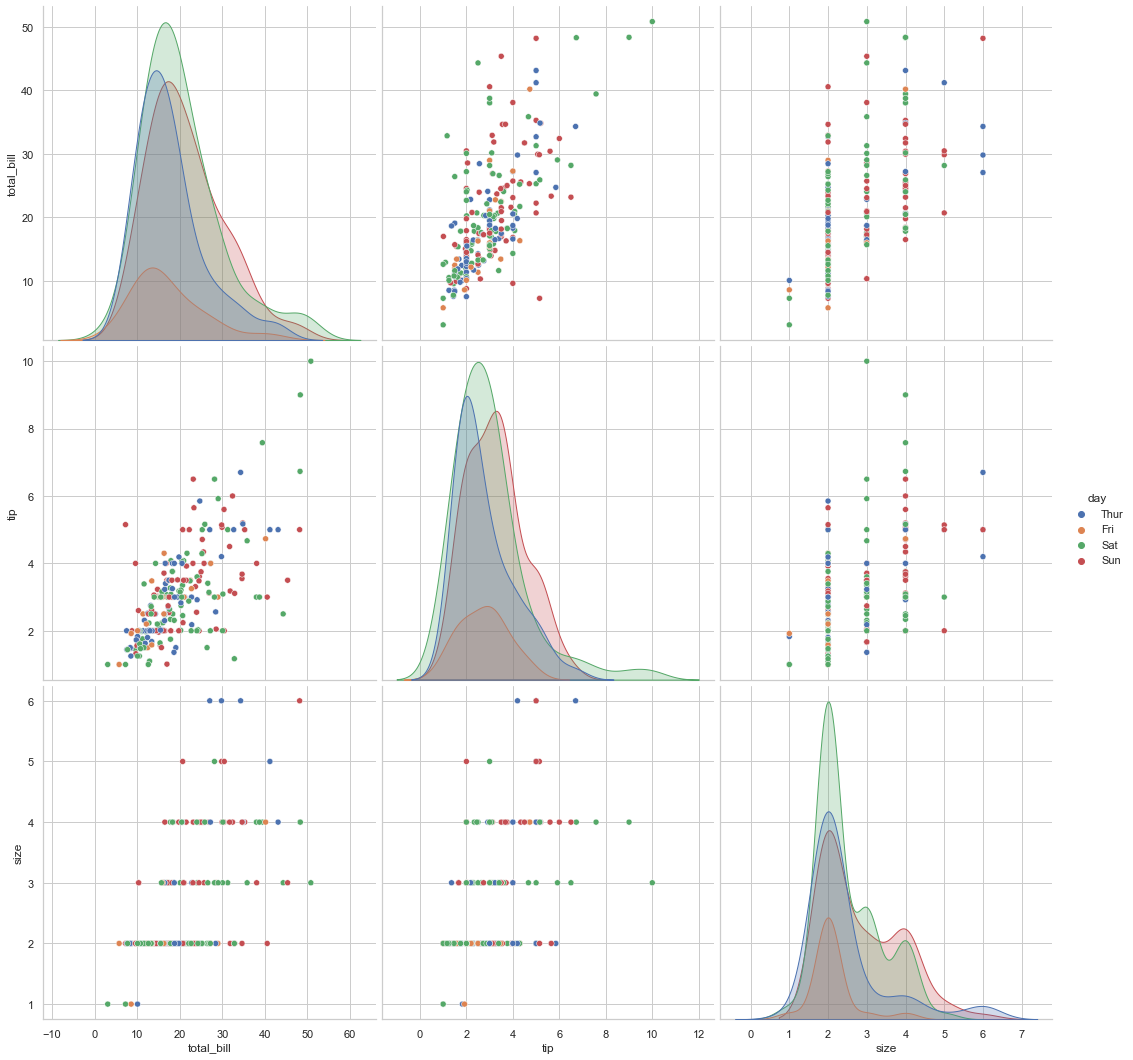

In [13]:
sns.pairplot(tips,  hue='day', size = 5)

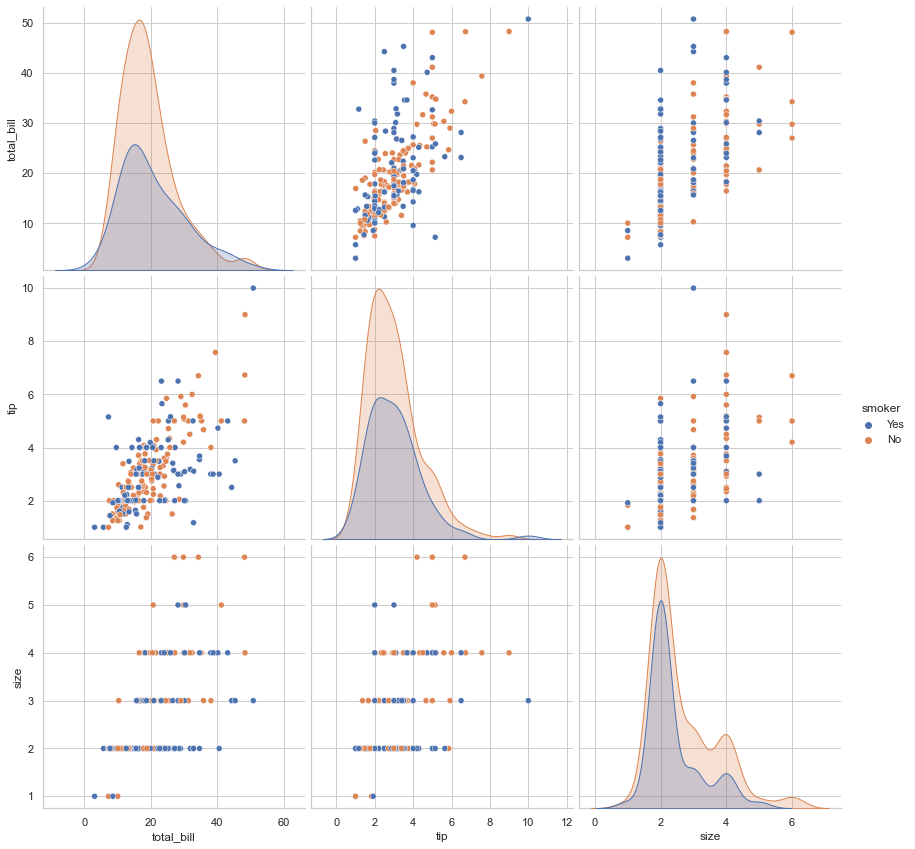

In [14]:
sns.pairplot(tips,  hue='smoker', size = 4)

**How to interpret**
At this level of detail (very coarse) we are looking for _separation_

Do we see the categorical variable splitting the chart into visible groups?

More precisely:
- Do you see the scatterplots forming a single scatter pattern or several?
- Do you see a significant difference between the distributions for different variables?

**Questions**

- What can we learn from these views?
- Which other categoricals would you plot?

**Assignment**
- Run the pairplot command using different categorical variables as `hue` and write down your learnings

## Going into more detail

Now that we have a handful of ideas about the dataset, we will dig deeper and explore different slices to try and understand it better.

We will use several tools depending on what kinds of questions we want to ask:
- To understand if a continuous varibale helps predict another one we can use `sns.jointplot`
- For the same with categoricals we can use `sns.barplot`
- If we want to explore more than one variable at a time we can use the `hue` parameter on all of the charts

Questions we can ask:
- Does party size predict the total bill?
- Does total bill predict the tip?
- Do women tip more than men?
- Do smokers tip more than non-smokers?

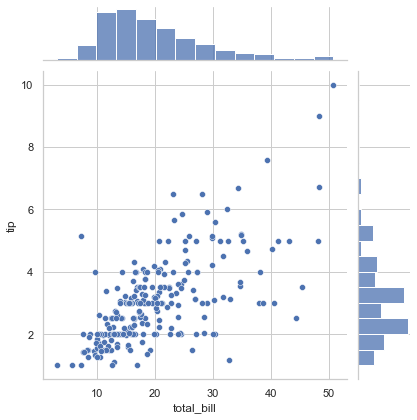

In [15]:
# does total bill predict the tip?
sns.jointplot(
    x='total_bill',
    y='tip',
    data=tips
)

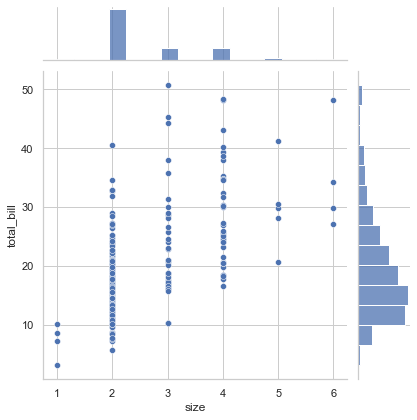

In [16]:
# does party size predict the total bill?
sns.jointplot(
    x='size',
    y='total_bill',
    data=tips
)

**How to interpret this**
The scatter plot will show us how much two variables affect eachother, the joint distributions can give us more hints in this direction.
- If the points are concentrated along a single line (straight or not) it will tell us that the variables are fairly well correlated
- If the points are very scattered (like in the second case) it may indicate that the variables don't relate well at all
  - If there seems to be a trend (like in the second chart) but the points are very spread out, it is a sign that the variables do affect one another, but there are other factors involved in the process that we're not capturing

In [17]:
tips["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='tip'>

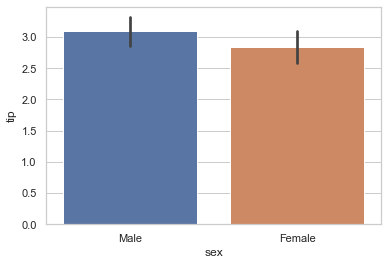

In [18]:
# Do women tip more than men?
sns.barplot(
    x='sex',
    y='tip',
    data=tips
)

In [19]:
tips[tips["smoker"] == "Yes"].mean()

total_bill    20.756344
tip            3.008710
size           2.408602
dtype: float64

In [20]:
tips[tips["smoker"] == "No"].mean()

total_bill    19.188278
tip            2.991854
size           2.668874
dtype: float64

<AxesSubplot:xlabel='smoker', ylabel='tip'>

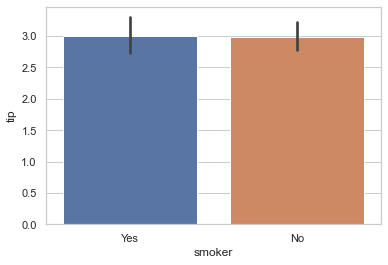

In [21]:
# Do smokers tip more than non-smokers?

sns.barplot(
    x='smoker',
    y='tip',
    data=tips
)

### Task:
- Try to use the charts discussed above to explore other combinations of variables and take note of your conclusions

# Change over Time: `lineplot` in `seaborn`

In [22]:
solar = pd.read_csv('installed-solar-PV-capacity.csv')

In [23]:
solar.head()

,Entity,Code,Year,Solar Capacity
0,Africa,NaN,1996,0.001012
1,Africa,NaN,1997,0.003037
2,Africa,NaN,1998,0.005062
3,Africa,NaN,1999,0.008099
4,Africa,NaN,2000,0.010927


In [24]:
entities = solar['Entity'].unique()
entities

array(['Africa', 'Algeria', 'Argentina', 'Asia Pacific', 'Australia',
       'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'CIS', 'Canada',
       'Chile', 'China', 'Czechia', 'Denmark', 'Egypt', 'Europe',
       'France', 'Germany', 'Greece', 'Honduras', 'Hungary', 'India',
       'Israel', 'Italy', 'Japan', 'Jordan', 'Malaysia', 'Mexico',
       'Middle East', 'Morocco', 'Netherlands', 'North America',
       'Other Africa', 'Other Asia Pacific', 'Other CIS', 'Other Europe',
       'Other Middle East', 'Other South & Central America', 'Pakistan',
       'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Slovakia', 'South & Central America', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan',
       'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Vietnam', 'World'],
      dtype=object)

<AxesSubplot:xlabel='Year', ylabel='Solar Capacity'>

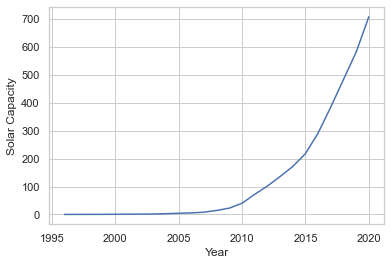

In [25]:
solar_world = solar[solar['Entity']=='World']
sns.lineplot(x='Year', y='Solar Capacity', data=solar_world)

In [26]:
#continents = [e for e in entities if e.startswith('Total')]
continents= []
for e in entities:
   if e.startswith('Total'):
     continents.append(e)
continents

[]

In [27]:
continents = [
        'North America',
        'South & Central America', 
        'Asia',
        'Australia',
        'Africa',
        'Europe']

<AxesSubplot:xlabel='Year', ylabel='Solar Capacity'>

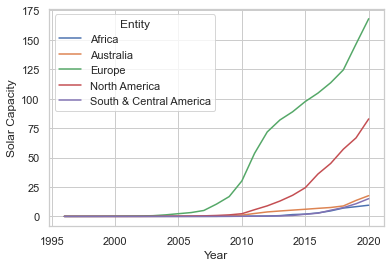

In [28]:
solar_continent = solar[solar['Entity'].isin(continents)]
sns.lineplot(x='Year', y='Solar Capacity', hue='Entity', data=solar_continent)

<AxesSubplot:xlabel='Year', ylabel='Solar Capacity'>

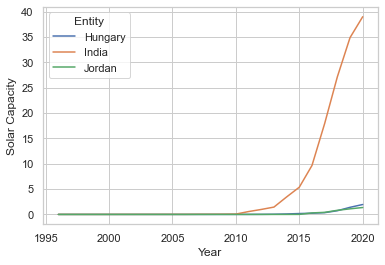

In [33]:
solar_country = solar[solar['Entity'].isin(['Jordan', 'Hungary', 'India'])]
sns.lineplot(x='Year', y='Solar Capacity', hue='Entity', data=solar_country)

# Lineplot revisited : `plot` in `mathplotlib.pyplot` 

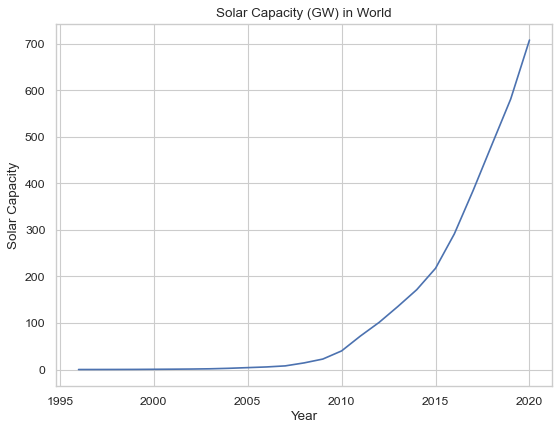

In [34]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.xlabel('Year')
plt.ylabel('Solar Capacity')
plt.title('Solar Capacity (GW) in World')
plt.plot('Year', 'Solar Capacity', data=solar_world)
plt.show()